# Optimization (`scipy.optimize`)

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


In [3]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [4]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})

res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

In [5]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [6]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

In [7]:
def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [8]:
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 66


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

In [9]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 20
         Hessian evaluations: 19


array([1., 1., 1., 1., 1.])

In [10]:
res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 20
         Hessian evaluations: 73


array([1., 1., 1., 1., 1.])

In [11]:
res = minimize(rosen, x0, method='trust-krylov',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})
res.x

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -6.273083e+02  4.029038e+02  0.000000e+00  0.000000e+00  2.246107e+03  4.021147e+03  2.486853e-04  3.217671e-02

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -9.528585e+01  1.478412e+02  0.000000e+00  0.000000e+00  6.001708e+02  1.890129e+03  5.290645e-04  6.067939e-02

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -8.662599e+00  5.824611e+01  0.000000e+00  0.000000e+00  1.285783e+02  9.542387e+02  1.047956e-03  2.052100e-01

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -

array([1., 1., 1., 1., 1.])

In [12]:
res = minimize(rosen, x0, method='trust-krylov',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})
res.x

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -6.273083e+02  4.029038e+02  0.000000e+00  0.000000e+00  2.246107e+03  4.021147e+03  2.486853e-04  3.217671e-02

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -9.528585e+01  1.478412e+02  0.000000e+00  0.000000e+00  6.001708e+02  1.890129e+03  5.290645e-04  6.067939e-02

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -8.662599e+00  5.824611e+01  0.000000e+00  0.000000e+00  1.285783e+02  9.542387e+02  1.047956e-03  2.052100e-01

 iter inewton type    objective     âgââ_Mâ»Â¹      leftmost         Î»             Î³             Î´             Î±             Î²       
     0     0  cg_i -

array([1., 1., 1., 1., 1.])

In [13]:
res = minimize(rosen, x0, method='trust-exact',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 13
         Hessian evaluations: 14


array([1., 1., 1., 1., 1.])

In [14]:
from scipy.optimize import Bounds
bounds = Bounds([0, -0.5], [1.0, 2.0])

In [15]:
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

In [16]:
def cons_f(x):
    return [x[0]**2 + x[1], x[0]**2 - x[1]]
def cons_J(x):
    return [[2*x[0], 1], [2*x[0], -1]]
def cons_H(x, v):
    return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])
from scipy.optimize import NonlinearConstraint
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

In [17]:
from scipy.sparse import csc_matrix
def cons_H_sparse(x, v):
    return v[0]*csc_matrix([[2, 0], [0, 0]]) + v[1]*csc_matrix([[2, 0], [0, 0]])
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H_sparse)

In [18]:
from scipy.sparse.linalg import LinearOperator
def cons_H_linear_operator(x, v):
    def matvec(p):
        return np.array([p[0]*2*(v[0]+v[1]), 0])
    return LinearOperator((2, 2), matvec=matvec)
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H_linear_operator)

In [19]:
from scipy.optimize import BFGS
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=BFGS())

In [20]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess='2-point')

In [21]:
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac='2-point', hess=BFGS())

In [22]:
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 1.11e-16, execution time: 0.034 s.
[0.41494531 0.17010937]


In [23]:
def rosen_hess_linop(x):
    def matvec(p):
        return rosen_hess_p(x, p)
    return LinearOperator((2, 2), matvec=matvec)
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess_linop,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 1.11e-16, execution time: 0.032 s.
[0.41494531 0.17010937]


In [24]:
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hessp=rosen_hess_p,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 1.11e-16, execution time: 0.023 s.
[0.41494531 0.17010937]


In [25]:
from scipy.optimize import SR1
res = minimize(rosen, x0, method='trust-constr',  jac="2-point", hess=SR1(),
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 7, optimality: 4.48e-09, constraint violation: 0.00e+00, execution time: 0.017 s.
[0.41494531 0.17010937]


In [26]:
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}

x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='SLSQP', jac=rosen_der,
               constraints=[eq_cons, ineq_cons], options={'ftol': 1e-9, 'disp': True},
               bounds=bounds)

print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.34271757499419825
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
[0.41494475 0.1701105 ]


In [27]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

<Figure size 640x480 with 1 Axes>

In [29]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

     fun: -935.3379515604197
    funl: array([-935.33795156])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
   nlfev: 37
   nlhev: 0
   nljev: 9
 success: True
       x: array([439.48096952, 453.97740589])
      xl: array([[439.48096952, 453.97740589]])

In [30]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

     fun: -959.6406627207414
 message: ['Maximum number of iteration reached']
    nfev: 4082
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([512.       , 404.2317953])

In [31]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)
results['BH'] = optimize.basinhopping(eggholder, bounds)
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

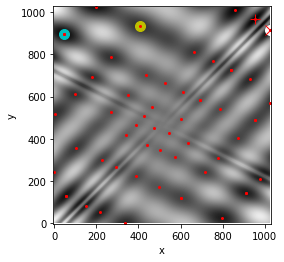

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()

In [33]:
from scipy.optimize import least_squares

def model(x, u):
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    return model(x, u) - y

def jac(x, u, y):
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

In [34]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
              8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
              4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

res.x

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.


array([0.192806  , 0.19130332, 0.12306046, 0.13607205])

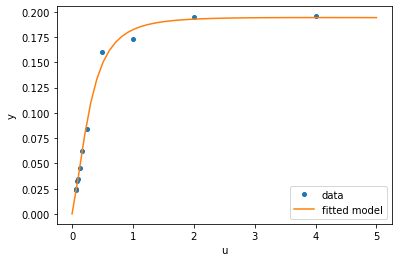

In [35]:
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data')
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

---

In [36]:
from scipy.optimize import least_squares
from scipy.sparse import coo_matrix

n = 100
c = 1

def f(u):
    return u**3

def f_prime(u):
    return 3 * u**2

def fun(u, n, f, f_prime, c, **kwargs):
    v = np.zeros((n + 2, n + 2))
    u = u.reshape((n, n))
    v[1:-1, 1:-1] = u
    y = v[:-2, 1:-1] + v[2:, 1:-1] + v[1:-1, :-2] + v[1:-1, 2:] - 4 * u + c * f(u)
    return y.ravel()

def compute_jac_indices(n):
    i = np.arange(n)
    jj, ii = np.meshgrid(i, i)

    ii = ii.ravel()
    jj = jj.ravel()

    ij = np.arange(n**2)

    jac_rows = [ij]
    jac_cols = [ij]

    mask = ii > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - n)

    mask = ii < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + n)

    mask = jj > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - 1)

    mask = jj < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + 1)

    return np.hstack(jac_rows), np.hstack(jac_cols)

jac_rows, jac_cols = compute_jac_indices(n)

def jac(u, n, f, f_prime, c, jac_rows=None, jac_cols=None):
    jac_values = np.ones_like(jac_cols, dtype=float)
    jac_values[:n**2] = -4 + c * f_prime(u)
    return coo_matrix((jac_values, (jac_rows, jac_cols)), shape=(n**2, n**2))

In [37]:
u0 = np.ones(n**2) * 0.5
jac_rows, jac_cols = compute_jac_indices(n)
res_1 = least_squares(fun, u0, jac=jac, gtol=1e-3, args=(n, f, f_prime, c), kwargs={'jac_rows': jac_rows, 'jac_cols': jac_cols}, verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 114, initial cost 1.0412e+02, final cost 2.9178e-03, first-order optimality 9.94e-04.


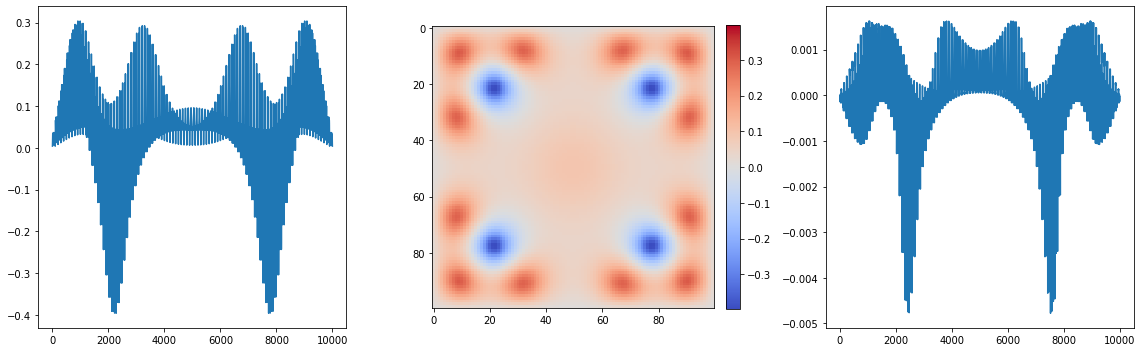

In [38]:
plt.figure(figsize=(16, 5))
plt.subplot(132)
plt.imshow(res_1.x.reshape((n, n)), cmap='coolwarm', vmin=-max(abs(res_1.x)), vmax=max(abs(res_1.x)))
plt.colorbar(use_gridspec=True, fraction=0.046, pad=0.04)
plt.subplot(131)
plt.plot(res_1.x)
plt.subplot(133)
plt.plot(res_1.fun)
plt.tight_layout()

In [39]:
res_2 = least_squares(fun, u0, jac=jac, bounds=(0, np.inf), gtol=1e-3,
                      args=(n, f, f_prime, c), kwargs={'jac_rows': jac_rows, 'jac_cols': jac_cols}, verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 34, initial cost 1.0412e+02, final cost 4.0952e-02, first-order optimality 9.64e-04.


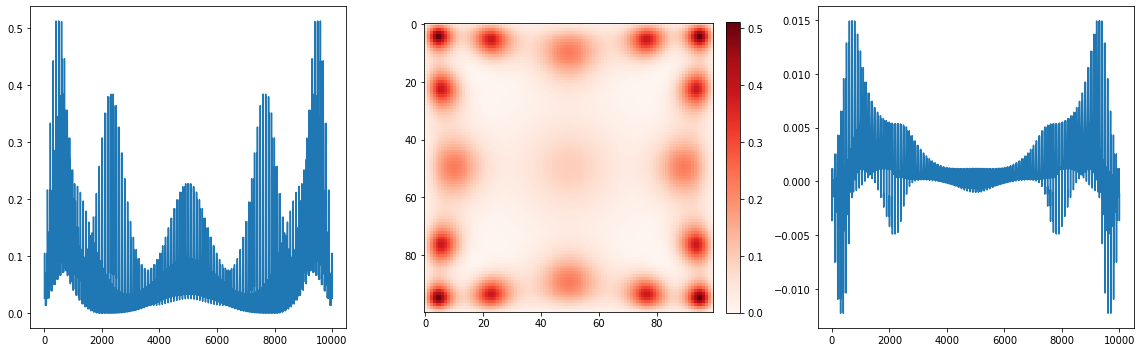

In [40]:
plt.figure(figsize=(16, 5))
plt.subplot(132)
plt.imshow(res_2.x.reshape((n, n)), cmap='Reds')
plt.colorbar(use_gridspec=True, fraction=0.046, pad=0.04)
plt.subplot(131)
plt.plot(res_2.x)
plt.subplot(133)
plt.plot(res_2.fun)
plt.tight_layout()

---

In [41]:
from scipy.optimize import minimize_scalar
f = lambda x: (x - 2) * (x + 1)**2
res = minimize_scalar(f, method='brent')
print(res.x)

1.0


In [42]:
from scipy.special import j1
res = minimize_scalar(j1, bounds=(4, 7), method='bounded')
res.x

5.3314418424098315

In [43]:
from scipy.optimize import OptimizeResult
def custmin(fun, x0, args=(), maxfev=None, stepsize=0.1,
        maxiter=100, callback=None, **options):
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        improved = False
        niter += 1
        for dim in range(np.size(x0)):
            for s in [bestx[dim] - stepsize, bestx[dim] + stepsize]:
                testx = np.copy(bestx)
                testx[dim] = s
                testy = fun(testx, *args)
                funcalls += 1
                if testy < besty:
                    besty = testy
                    bestx = testx
                    improved = True
            if callback is not None:
                callback(bestx)
            if maxfev is not None and funcalls >= maxfev:
                stop = True
                break

    return OptimizeResult(fun=besty, x=bestx, nit=niter,
                          nfev=funcalls, success=(niter > 1))
x0 = [1.35, 0.9, 0.8, 1.1, 1.2]
res = minimize(rosen, x0, method=custmin, options=dict(stepsize=0.05))
res.x

array([1., 1., 1., 1., 1.])

In [44]:
def custmin(fun, bracket, args=(), maxfev=None, stepsize=0.1,
        maxiter=100, callback=None, **options):
    bestx = (bracket[1] + bracket[0]) / 2.0
    besty = fun(bestx)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        improved = False
        niter += 1
        for testx in [bestx - stepsize, bestx + stepsize]:
            testy = fun(testx, *args)
            funcalls += 1
            if testy < besty:
                besty = testy
                bestx = testx
                improved = True
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return OptimizeResult(fun=besty, x=bestx, nit=niter,
                          nfev=funcalls, success=(niter > 1))
def f(x):
    return (x - 2)**2 * (x + 2)**2
res = minimize_scalar(f, bracket=(-3.5, 0), method=custmin,
                      options=dict(stepsize = 0.05))
res.x

-2.0

In [45]:
from scipy.optimize import root
def func(x):
    return x + 2 * np.cos(x)
sol = root(func, 0.3)
sol.x

sol.fun

array([-6.66133815e-16])

In [46]:
def func2(x):
    f = [x[0] * np.cos(x[1]) - 4,
         x[1]*x[0] - x[1] - 5]
    df = np.array([[np.cos(x[1]), -x[0] * np.sin(x[1])],
                   [x[1], x[0] - 1]])
    return f, df
sol = root(func2, [1, 1], jac=True, method='lm')
sol.x

array([6.50409711, 0.90841421])

0:  |F(x)| = 40.1231; step 1
1:  |F(x)| = 16.8214; step 1
2:  |F(x)| = 5.69096; step 1
3:  |F(x)| = 1.40675; step 1
4:  |F(x)| = 0.0385813; step 1
5:  |F(x)| = 0.00171513; step 1
6:  |F(x)| = 0.000132303; step 1
7:  |F(x)| = 6.25528e-06; step 1
8:  |F(x)| = 4.29134e-07; step 1
Residual: 4.29134e-07


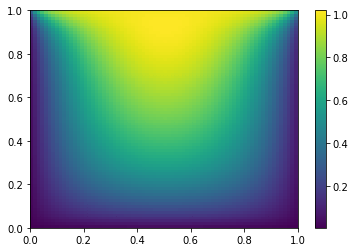

In [47]:
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y + 5*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = root(residual, guess, method='krylov', options={'disp': True})
#sol = root(residual, guess, method='broyden2', options={'disp': True, 'max_rank': 50})
#sol = root(residual, guess, method='anderson', options={'disp': True, 'M': 10})
print('Residual: %g' % abs(residual(sol.x)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol.x)
plt.colorbar()
plt.show()

In [48]:
from scipy.optimize import root
from scipy.sparse import spdiags, kron
from scipy.sparse.linalg import spilu, LinearOperator
from numpy import cosh, zeros_like, mgrid, zeros, eye

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def get_preconditioner():
    """Compute the preconditioner M"""
    diags_x = zeros((3, nx))
    diags_x[0,:] = 1/hx/hx
    diags_x[1,:] = -2/hx/hx
    diags_x[2,:] = 1/hx/hx
    Lx = spdiags(diags_x, [-1,0,1], nx, nx)

    diags_y = zeros((3, ny))
    diags_y[0,:] = 1/hy/hy
    diags_y[1,:] = -2/hy/hy
    diags_y[2,:] = 1/hy/hy
    Ly = spdiags(diags_y, [-1,0,1], ny, ny)

    J1 = kron(Lx, eye(ny)) + kron(eye(nx), Ly)

    # Now we have the matrix `J_1`. We need to find its inverse `M` --
    # however, since an approximate inverse is enough, we can use
    # the *incomplete LU* decomposition

    J1_ilu = spilu(J1)

    # This returns an object with a method .solve() that evaluates
    # the corresponding matrix-vector product. We need to wrap it into
    # a LinearOperator before it can be passed to the Krylov methods:

    M = LinearOperator(shape=(nx*ny, nx*ny), matvec=J1_ilu.solve)
    return M

def solve(preconditioning=True):
    """Compute the solution"""
    count = [0]

    def residual(P):
        count[0] += 1

        d2x = zeros_like(P)
        d2y = zeros_like(P)

        d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2])/hx/hx
        d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
        d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

        d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
        d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
        d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

        return d2x + d2y + 5*cosh(P).mean()**2

    # preconditioner
    if preconditioning:
        M = get_preconditioner()
    else:
        M = None

    # solve
    guess = zeros((nx, ny), float)

    sol = root(residual, guess, method='krylov',
               options={'disp': True,
                        'jac_options': {'inner_M': M}})
    print('Residual', abs(residual(sol.x)).max())
    print('Evaluations', count[0])

    return sol.x

0:  |F(x)| = 40.1231; step 1
1:  |F(x)| = 16.8214; step 1
2:  |F(x)| = 5.69096; step 1
3:  |F(x)| = 1.40675; step 1
4:  |F(x)| = 0.0385813; step 1
5:  |F(x)| = 0.00171513; step 1
6:  |F(x)| = 0.000132303; step 1
7:  |F(x)| = 6.25528e-06; step 1
8:  |F(x)| = 4.29134e-07; step 1
Residual 4.291341335616039e-07
Evaluations 317


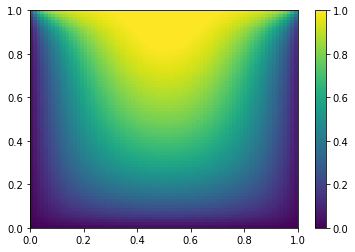

In [49]:
sol = solve(preconditioning=False)

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.clf()
plt.pcolor(x, y, sol)
plt.clim(0, 1)
plt.colorbar()
plt.show()

0:  |F(x)| = 36.6457; step 1
1:  |F(x)| = 0.246602; step 1
2:  |F(x)| = 0.0597787; step 1
3:  |F(x)| = 3.74416e-05; step 1
4:  |F(x)| = 8.34925e-10; step 1


/Users/alex/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:394: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Residual 8.349250180117451e-10
Evaluations 140


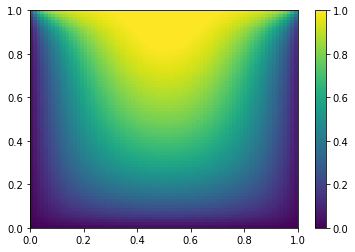

In [50]:
sol = solve(preconditioning=True)

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.clf()
plt.pcolor(x, y, sol)
plt.clim(0, 1)
plt.colorbar()
plt.show()